In [74]:
#global constants
import numpy as np
c=299792458
e=-1.602176634e-19
m_e= 9.1093837015e-31

B0 = 0.0035     # Magnetic field strength (T)
R = 0.1         # Radius of solenoid (m)
L = 0.75        # Length of solenoid (m)


In [75]:
import numpy
def integrate(F,t,y,tstop,h):
  def run_kut4(F,t,y,h):
    K0=h*F(t,y)
    K1=h*F(t+h/2,y+K0/2)
    K2=h*F(t+h/2,y+K1/2)
    K3=h*F(t+h,y+K2)
    return (K0+2*K1+2*K2+K3)/6

  T=[]
  Y=[]
  T.append(t)
  Y.append(y)
  while t<tstop:
    h=min(h,tstop-t)
    y=y+run_kut4(F,t,y,h)
    t=t+h
    T.append(t)
    Y.append(y)
  return np.array(T),np.array(Y)

In [76]:

# Initial Conditions
x0 = (3/4) * R  # Initial x position (m)
y0 = 0          # Initial y position (m)
z0 = -0.3       # Initial z position (m)
vx0 = 0         # Initial velocity in x (m/s)
vy0 = 0         # Initial velocity in y (m/s)
vz0 = 0.06*c       # Initial velocity in z (m/s)


def B_func(position,B0=0.0035,L=0.75,R=0.1):
  x,y,z=position[0],position[1],position[2]
  Bz = (B0/2) * ((z / np.sqrt(z**2 + R**2)) - ((z-L) / np.sqrt((z-L)**2 + R**2)))

  denom = np.sqrt(x**2 + y**2)
  if denom == 0:
    Bx=0
    By=0
  else:
    Bx = -((B0*R**2)/4) * (x**2) * (((z**2 + R**2)**(-3/2)) - (((z-L)**2 + R**2)**(-3/2))) / denom
    By = -((B0*R**2)/4) * (y**2) * (((z**2 + R**2)**(-3/2)) - (((z-L)**2 + R**2)**(-3/2))) / denom
  return np.array([Bx, By, Bz])


def lorentz_force(e, v, B):
  return e * (np.cross(v, B) )

r0 = np.array([x0,y0,z0])
v0 = np.array([vx0,vy0,vz0])
Bo=B_func(r0)


In [77]:
def F(t,y):

  def B_func(position,B0=0.0035,L=0.75,R=0.1):
    x,y,z=position[0],position[1],position[2]
    Bz = (B0/2) * ((z / np.sqrt(z**2 + R**2)) - ((z-L) / np.sqrt((z-L)**2 + R**2)))

    denom = np.sqrt(x**2 + y**2)
    if denom == 0:
      Bx=0
      By=0
    else:
      Bx = -((B0*R**2)/4) * (x**2) * (((z**2 + R**2)**(-3/2)) - (((z-L)**2 + R**2)**(-3/2))) / denom
      By = -((B0*R**2)/4) * (y**2) * (((z**2 + R**2)**(-3/2)) - (((z-L)**2 + R**2)**(-3/2))) / denom
    return np.array([Bx, By, Bz])


  curx=y[0]  #current x projection of position
  curvx=y[1] #current x component of velocity
  cury=y[2] # and so on. ..
  curvy=y[3]
  curz=y[4]
  curvz=y[5]
  Bfield=B_func(np.array([curx,cury,curz]))
  Bcurx,Bcury,Bcurz=Bfield[0],Bfield[1],Bfield[2]

  F=np.zeros(6)
  F[0]=y[1]
  F[1]=-(e/m_e)* (curvy*Bcurz-curvz*Bcury)
  F[2]=y[3]
  F[3]=(e/m_e)* (curvx*Bcurz-curvz*Bcurx)
  F[4]=y[5]
  F[5]=-(e/m_e)* (curvx*Bcury-curvy*Bcurx)
  return F

t=0
tstop=1/1000
y=np.array([x0,vx0,y0,vy0,z0,vz0])
h = 3*10e-10  #  time step
T,Y=integrate(F,t,y,tstop,h)

In [24]:
import matplotlib.pyplot as plt



In [78]:
tbatta,Xbatta,Ybatta,Zbatta=[],[],[],[]
for counter in range(0,len(Y)):
  Xbatta.append(Y[counter][0])
  Ybatta.append(Y[counter][2])
  Zbatta.append(Y[counter][4])



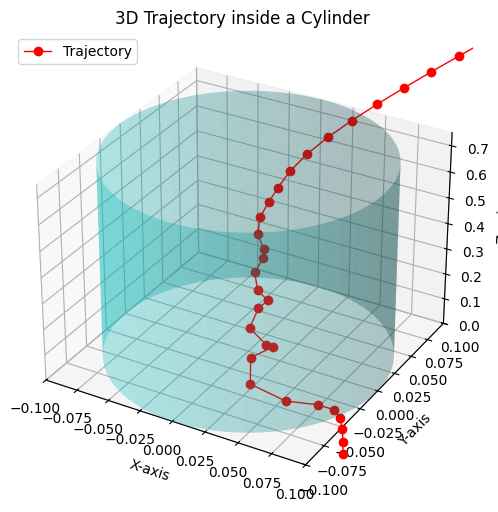

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract x, y, z coordinates of trajectory
x_traj = np.array(Xbatta)
y_traj = np.array(Ybatta)
z_traj = np.array(Zbatta)

# Cylinder parameters
R = 0.1   # Radius of the cylinder
L = 0.75   # Length of the cylinder

# Generate cylinder
theta = np.linspace(0, 2 * np.pi, 100)  # Circular base angle
z = np.linspace(0, L, 100)  # Height along the z-axis
Theta, Z = np.meshgrid(theta, z)  # Create a grid

# Convert to Cartesian coordinates
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Create figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot cylinder surface
ax.plot_surface(X, Y, Z, color='c', alpha=0.3, edgecolor='none')

# Plot the trajectory
ax.plot(x_traj, y_traj, z_traj, marker='o', linestyle='-', color='r', label='Trajectory', linewidth=1)

# Labels and title
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("3D Trajectory inside a Cylinder")

# Set limits
ax.set_xlim([-R, R])
ax.set_ylim([-R, R])
ax.set_zlim([0, L])

plt.legend()
plt.savefig("trjesol.png")


<ipython-input-87-ff1ba2ba50a7>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


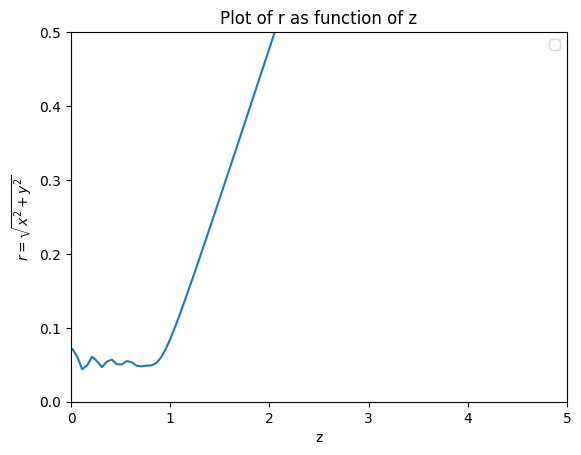

In [87]:

plt.plot(z_traj,np.sqrt( x_traj**2  +  y_traj**2 ) )
plt.title("Plot of r as function of z")

plt.xlabel("z")
plt.xlim(0,5)
plt.ylim(0,0.5)
plt.ylabel(r"$r = {\sqrt{x^2 + y^2}} $")
plt.legend()

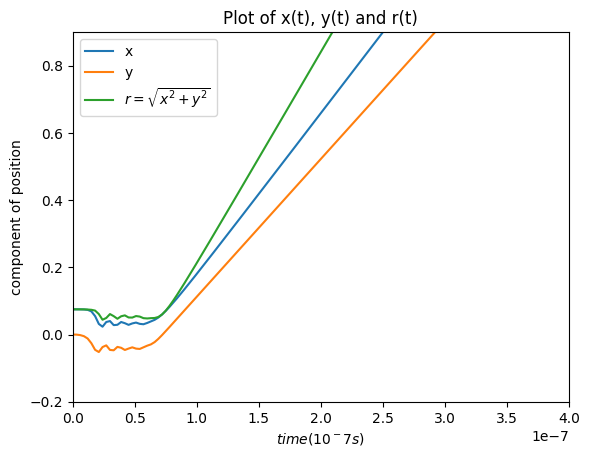

In [117]:
plt.title("Plot of x(t), y(t) and r(t)")
plt.plot(T,x_traj,label="x")
plt.plot(T,y_traj,label="y")
plt.plot(T,np.sqrt( x_traj**2  +  y_traj**2 ),label=r"$r = {\sqrt{x^2 + y^2}} $")
plt.xlim(0,0.0000004)
plt.xlabel(f"$time (10^-7s)$")

plt.ylabel(r"component of position")
plt.ylim(-.2,.9)
plt.legend()

In [128]:
KE_batta=[]  #empty list
KE_initial = 0.5 * m_e * (vx0**2 + vy0**2 + vz0**2)
for count in range(0,len(Y)-1):
  v1=Y[count][1]
  v2=Y[count][3]
  v3=Y[count][5]
  KE_batta.append(0.5 * m_e * (v1**2 + v2**2 + v3**2))


Text(0, 0.5, '$ ln \\Delta K /K_0$')

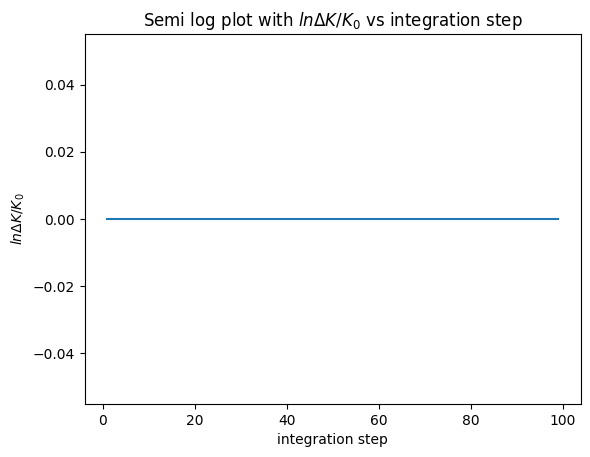

In [140]:

KE_error = np.abs(np.array(KE_batta) / KE_initial - 1)
plt.title("Semi log plot with "+f"$ln \Delta K /K_0$ "+"vs integration step")
plt.plot(        np.arange(1,len(Y)),np.log(KE_error)          )
plt.xlabel("integration step")
plt.ylabel(f"$ ln \Delta K /K_0$")
#plt.ylim(-0.0009,0.0009)
